# Week 5 Tasks — Data Visualization in Python

Use this template to complete Week 5 tasks. Replace placeholders with your work. Ensure the notebook runs top-to-bottom without errors. Add short captions/annotations below each plot.


In [26]:
# Setup
import sys
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
%matplotlib inline


In [27]:
# Task 1 — Setup and Data Loading
# TODO: Load your dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ncr_ride_bookings.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yashdevladdha/uber-ride-analytics-dashboard",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head(10)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


Briefly describe the dataset and variables here.


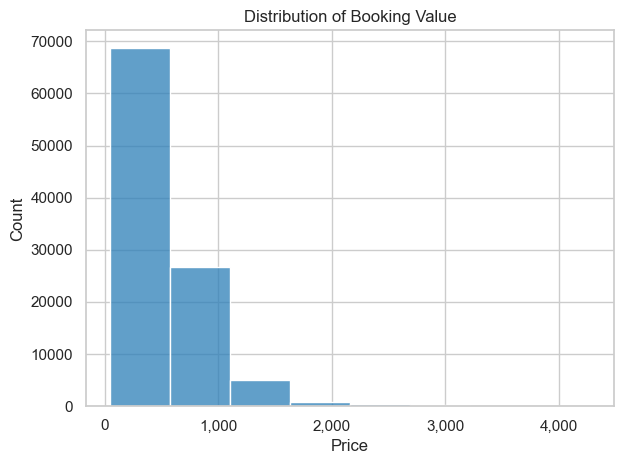

In [28]:
# Task 2 — Univariate Visualizations
# Example histogram/density for a numeric variable
# sns.histplot(df['numeric_col'], bins=30, kde=True)
# plt.title('Distribution of numeric_col')
# plt.show()

from matplotlib.ticker import StrMethodFormatter

df["BookingValue"] = pd.to_numeric(
    df["Booking Value"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
    errors="coerce"
)


sns.set_theme(style="whitegrid")
ax = sns.histplot(
    data=df,
    x="BookingValue",
    binwidth=500,
    color="#2c7fb8",
    edgecolor="white"
)

ax.set_title("Distribution of Booking Value")
ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()

Key takeaway:

Pronounced right skew: The majority of reservations are cheap to mid-priced, with a long tail extending to high values (infrequent costly visits).
The primary mass seems to be about inside the 200-1,200 range, based on visual estimation of the bins, exhibiting a single dominating mode.
Significant outliers:  Several reservations fall within the range of 2,000 to 5,000; categorize them as outliers or a separate group.
Potential negatives/zeros:  The x-axis seems to decline below zero, perhaps indicating refunds, credits, or data discrepancies.  Deserving of validation.


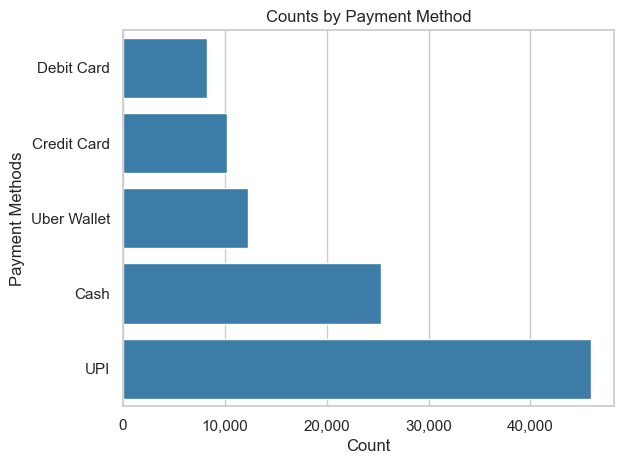

In [37]:
# Example bar plot for a categorical variable
# (df['category']
#   .value_counts()
#   .plot(kind='bar', color='#7fcdbb'))
# plt.title('Counts by category')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.show()

df["Payment Method"] = df["Payment Method"].replace("null", pd.NA)
df = df.dropna(subset=["Payment Method"])

counts = (
    df.groupby("Payment Method", dropna=False)
      .size()
      .reset_index(name="n")
)
order = counts.sort_values("n")["Payment Method"]

sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=counts,
    y="Payment Method", x="n",
    order=order,
    color="#2c7fb8", edgecolor="white",
)

ax.set_title("Counts by Payment Method")
ax.set_xlabel("Count")
ax.set_ylabel("Payment Methods")
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()

Key takeaway:

UPI prevails significantly as the predominant method of payment for clients.
 Cash remains the unequivocal second choice, nevertheless comprising a substantial portion, indicating potential for transition to digital alternatives.
 Uber Wallet has a moderate position in terms of acceptance, significantly trailing behind UPI; it presents a possible opportunity for promotions and loyalty initiatives.
 Card transactions (credit/debit) lag behind both UPI and cash; card incentives are not increasing market share.
 Operational implication: guarantee the robustness of UPI uptime and restrictions; enhance cash management to minimize friction and leakage.


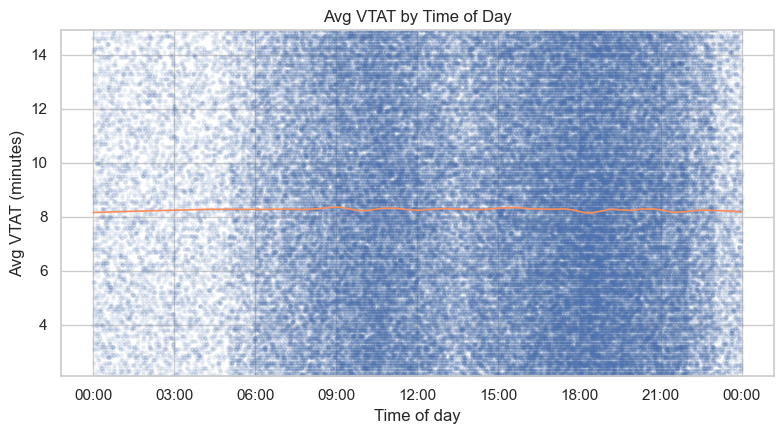

In [42]:
# Task 3 — Bivariate Visualizations
# Example scatter with regression line
# sns.regplot(data=df, x='xvar', y='yvar', scatter_kws={'alpha':0.6}, line_kws={'color':'#fc8d59'})
# plt.title('xvar vs yvar')
# plt.show()

import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess

df["AvgVTAT"] = pd.to_numeric(
    df["Avg VTAT"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
    errors="coerce"
)

t = pd.to_datetime(df["Time"].astype(str), errors="coerce")
secs = (t.dt.hour * 3600 + t.dt.minute * 60 + t.dt.second).astype("float")
base = pd.Timestamp("2000-01-01")
df["time_of_day"] = base + pd.to_timedelta(secs, unit="s")

df = df.dropna(subset=["time_of_day", "AvgVTAT"])

ylims = np.nanpercentile(df["AvgVTAT"], [1, 99])

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(df["time_of_day"], df["AvgVTAT"], s=6, alpha=0.08, marker="o")

xy = df[["time_of_day", "AvgVTAT"]].dropna()
x = mdates.date2num(xy["time_of_day"])
y = xy["AvgVTAT"].to_numpy()
sm = lowess(y, x, frac=0.1, return_sorted=True)
ax.plot(mdates.num2date(sm[:, 0]), sm[:, 1], color="#fc8d59", linewidth=1.2)

ax.set_ylim(ylims)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
ax.set_title("Avg VTAT by Time of Day")
ax.set_xlabel("Time of day")
ax.set_ylabel("Avg VTAT (minutes)")

plt.tight_layout()
plt.show()

Interpretation:

The scatter plot indicates that the average VTAT remains pretty consistent at around 8–9 minutes all day long, and the smooth line is basically flat over the 24-hour period.  Every hour, there’s a pretty big spread (like 3–15+ minutes), showing a lot of variability that doesn’t really make sense with just the clock time.  Any little dip in the middle of the day or a rise in the evening doesn't really matter much compared to all the other stuff going on.  It seems like pickup latency is influenced more by local factors like where you are, what supplies are available, and the type of vehicle, rather than the time of day.


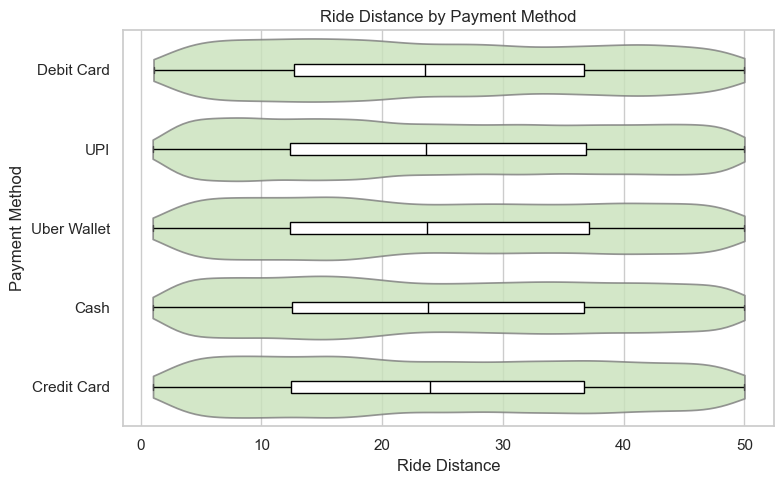

In [43]:
# Example violin/box by category
# sns.violinplot(data=df, x='category', y='numeric_col', inner='box')
# plt.title('numeric_col by category')
# plt.show()

df["Payment Method"] = df["Payment Method"].replace("null", pd.NA)
df["RideDistance"] = pd.to_numeric(
    df["Ride Distance"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
    errors="coerce"
)

df_clean = df.dropna(subset=["Payment Method", "RideDistance"])

order = (
    df_clean.groupby("Payment Method")["RideDistance"]
            .median()
            .sort_values()
            .index
)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(
    data=df_clean, y="Payment Method", x="RideDistance",
    order=order, inner=None, color="#c7e9b4", cut=0, alpha=0.8, ax=ax
)

sns.boxplot(
    data=df_clean, y="Payment Method", x="RideDistance",
    order=order, width=0.15, showcaps=True, fliersize=2,
    boxprops=dict(facecolor="white", edgecolor="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    ax=ax
)

ax.set_title("Ride Distance by Payment Method")
ax.set_xlabel("Ride Distance")
ax.set_ylabel("Payment Method")
plt.tight_layout()
plt.show()

Interpretation:

The distributions across approaches are quite comparable: medians about 24-27, and the interquartile ranges are approximately 15-35.
 The differences are minimal, with Cash/Uber Wallet seeming somewhat elevated compared to Debit; nonetheless, the overlap is substantial.
 The extensive variation within each method indicates that the payment method is a poor predictor of distance.
 A distinct bulk around brief excursions and an upper limit approaching 50, indicating a restriction or truncation in documented distance.



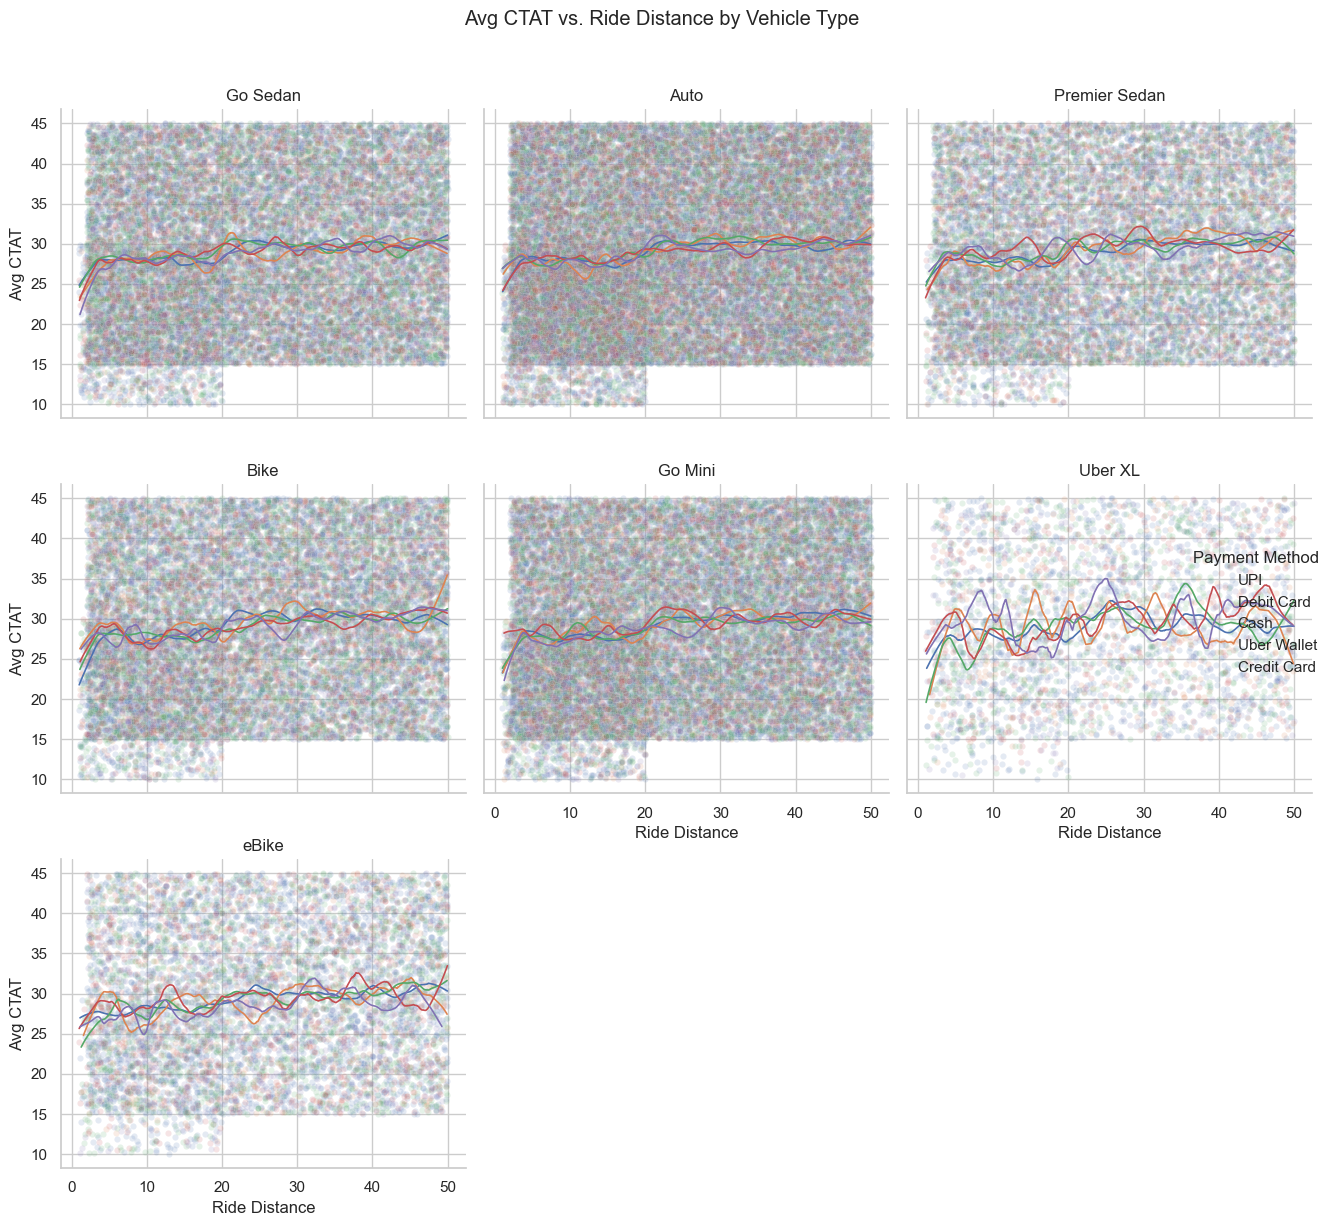

In [45]:
# Task 4 — Multivariate Visualizations
# Example facets with seaborn
# g = sns.FacetGrid(df, col='facet_var', hue='group', col_wrap=3, height=3, sharex=False, sharey=False)
# g.map_dataframe(sns.scatterplot, x='xvar', y='yvar', alpha=0.6)
# g.add_legend()
# g.fig.suptitle('Relationship by facet_var', y=1.02)
# plt.show()

df["RideDistance"] = pd.to_numeric(
    df["Ride Distance"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
    errors="coerce"
)
df["AvgCTAT"] = pd.to_numeric(
    df["Avg CTAT"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
    errors="coerce"
)

df = df.dropna(subset=["RideDistance", "AvgCTAT", "Payment Method", "Vehicle Type"])

try:
    from statsmodels.nonparametric.smoothers_lowess import lowess
    def add_smooth(x, y, color, ax):
        ok = np.isfinite(x) & np.isfinite(y)
        sm = lowess(y[ok], x[ok], frac=0.1, return_sorted=True)
        ax.plot(sm[:, 0], sm[:, 1], color=color, linewidth=1.2)
except Exception:
    # Fallback: binned means (moving-average style)
    def add_smooth(x, y, color, ax, nbins=30):
        ok = np.isfinite(x) & np.isfinite(y)
        x, y = x[ok], y[ok]
        bins = np.linspace(x.min(), x.max(), nbins + 1)
        idx = np.digitize(x, bins)
        xc = 0.5 * (bins[:-1] + bins[1:])
        yc = [np.nanmean(y[idx == i]) for i in range(1, nbins + 1)]
        ax.plot(xc, yc, color=color, linewidth=1.2)

# --- Faceted scatter + smoother (by Vehicle Type; color = Payment Method) ---
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    df, col="Vehicle Type", hue="Payment Method",
    height=4, aspect=1, col_wrap=3, sharex=True, sharey=True
)

g.map_dataframe(
    sns.scatterplot, x="RideDistance", y="AvgCTAT",
    alpha=0.15, s=20
)

def _smooth_map(data, color, **k):
    ax = plt.gca()
    add_smooth(data["RideDistance"].to_numpy(),
               data["AvgCTAT"].to_numpy(),
               color=color, ax=ax)

g.map_dataframe(_smooth_map)
g.add_legend(title="Payment Method")
g.set_axis_labels("Ride Distance", "Avg CTAT")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Avg CTAT vs. Ride Distance by Vehicle Type", y=1.02)
plt.tight_layout()
plt.show()


Short note:

The average CTAT goes up a bit with Ride Distance for different vehicle types, but the effect is pretty small.  The baseline CTAT varies a little depending on the vehicle, with sedans being slightly higher compared to bikes and autos.  The payment method doesn't really stand out, which means it probably doesn’t have a big impact on CTAT at a certain distance.


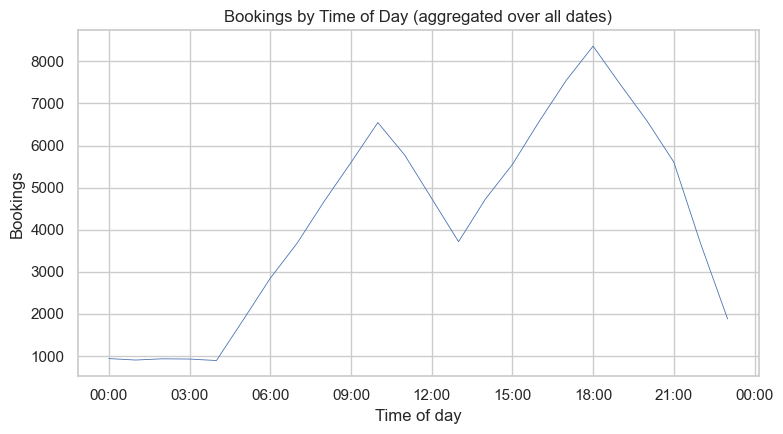

In [46]:
# Task 5 — Temporal or Composition Analysis
# Example time series plot (if applicable)
# sns.lineplot(data=df, x='date_col', y='value', color='#2b8cbe')
# plt.title('Value over time')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()

import matplotlib.dates as mdates

t = pd.to_datetime(df["Time"].astype(str), errors="coerce")

hourly_counts = (
    t.dt.floor("H").dt.hour
      .value_counts()
      .sort_index()
)

base = pd.Timestamp("2000-01-01")
tod_axis = base + pd.to_timedelta(hourly_counts.index, unit="h")

daily_cnt = pd.DataFrame({
    "tod_hour": tod_axis,
    "bookings": hourly_counts.values
})

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 4.5))

sns.lineplot(data=daily_cnt, x="tod_hour", y="bookings", linewidth=0.6, ax=ax)

ax.set_title("Bookings by Time of Day (aggregated over all dates)")
ax.set_xlabel("Time of day")
ax.set_ylabel("Bookings")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

plt.tight_layout()
plt.show()


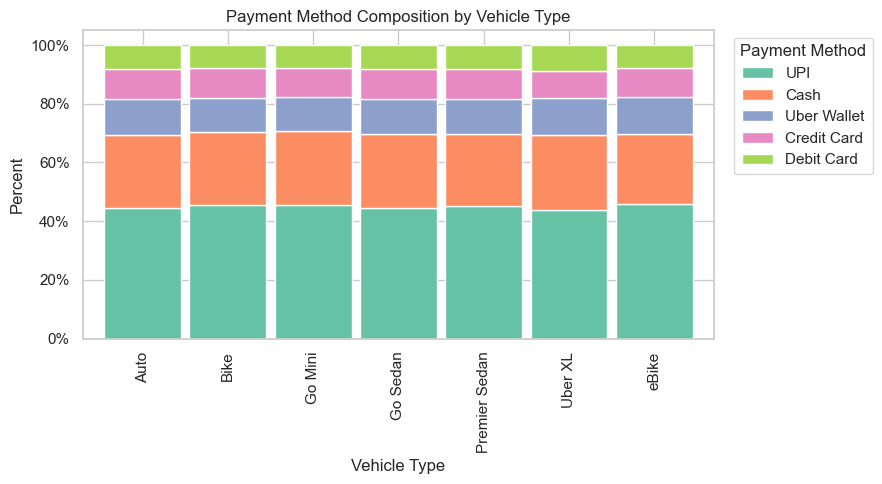

In [47]:
# Composition alternative if no time variable
# comp = (df.groupby(['group','category']).size()
#           .groupby(level=0).apply(lambda s: s/s.sum())
#           .rename('p').reset_index())
# sns.barplot(data=comp, x='group', y='p', hue='category')
# plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x:.0%}")
# plt.title('Composition by group')
# plt.show()

from matplotlib.ticker import PercentFormatter

df["Payment Method"] = df["Payment Method"].replace("null", pd.NA).fillna("Missing")

counts = (
    df.groupby(["Vehicle Type", "Payment Method"], dropna=False)
      .size()
      .rename("n")
      .reset_index()
)

counts["p"] = counts["n"] / counts.groupby("Vehicle Type")["n"].transform("sum")

pct = (
    counts.pivot(index="Vehicle Type", columns="Payment Method", values="p")
          .fillna(0.0)
          .sort_index()
)

pct = pct[pct.mean().sort_values(ascending=False).index]

sns.set_theme(style="whitegrid")
colors = sns.color_palette("Set2", n_colors=pct.shape[1])

ax = pct.plot(kind="bar", stacked=True, color=colors, figsize=(9,5), width=0.9)

ax.set_title("Payment Method Composition by Vehicle Type")
ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Percent")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.legend(title="Payment Method", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

# Task 6 — Geospatial (Bonus)
If you have location data, consider a simple map (choropleth or points).


# Task 7 — Aesthetics and Clarity
List the style choices you made (titles, labels, themes, color choices).

List the style choices you made (titles, labels, themes, color choices).

1. Global/recurring
-theme_minimal() for a clean look.
-Ordered categories with fct_reorder(...).
-Transparent points (alpha ~ 0.1-0.6) to reduce overplotting.
-Smooth trend lines via geom_smooth(method = "loess", se = FALSE, linewidth ~ 0.6).
-Rotated bars with coord_flip() where helpful.
2. Histogram - "Distribution of Booking Value"
-Title: Distribution of Booking Value
-Axes: x = "Price", y = "Count"; scale_x_continuous(labels = scales::comma)
-Colors: Bars filled #2c7fb8, white border; binwidth = 100.
3. Bar chart - "Counts by Payment Method"
-Title: Counts by Payment Method
-Axes: x = "Payment Methods", y = "Count"
-Colors: geom_col(fill = "orange", color = "white")
-Layout: coord_flip() to read labels easily.
4. Scatter - "Avg VTAT by Time of Day"
-Axes labels: x = "Time of day", y = "Avg VTAT (minutes)"
-Theme: theme_minimal() (light grid, clean background)
-Points: geom_point(shape = 16, size = 0.6, alpha = 0.08) (dense scatter, high transparency)
-Trend line: geom_smooth(method = "loess", se = FALSE, linewidth = 0.8, color = "#fc8d59")
-X scale: scale_x_time(labels = "%H:%M")
-Y view window: coord_cartesian(ylim = quantile(AvgVTAT, c(.01, .99))) (focus without dropping data)
-Colors: points in grayscale (default), trend line in #fc8d59 (soft orange)
5. Violin + box - "Ride Distance by Payment Method
-Title: Ride Distance by Payment Method
-Axes: x = "Ride Distance", y = "Payment Method"
-Colors: Violins fill = "#c7e9b4", color = "gray30"; boxplots white fill.
6. Facets - "Avg CTAT vs. Ride Distance by Vehicle Type"
-Title: Avg CTAT vs. Ride Distance by Vehicle Type
-Mapping: color = Payment Method (ggplot default palette)
-Faceting: facet_wrap(~ Vehicle Type`)`.
7. Temporal line - "Bookings by Time of Day (aggregated over all dates)"
-Axes: x = "Time of day", y = "Bookings"
-Style: geom_line(linewidth = 0.6).
8. Composition (stacked 100%) - "Payment Method Composition by Vehicle Type"
-Axes: x = "Vehicle Type", y = "Percent"
-Legend: fill = "Payment Method"
-Scale: scale_y_continuous(labels = scales::percent_format())
-Colors: Categorical fills per payment method (ggplot default palette) plus a "Missing" category.

# Task 8 — Narrative and Reproducibility
Write 5–10 sentences connecting the plots into a cohesive story and add final insights.

Bookings have this pretty clear daily pattern: they’re super low overnight, start to pick up after the morning, and then hit their highest point during the evening commute.  Even though the volume changes a lot, the ride distance stays pretty consistent throughout the day, and the VTAT scatter shows a flat trend around 8–9 minutes—pickup latency isn’t really affected by the time.  Booking values are skewed to the right, meaning that most trips are priced low to mid-range, while there are some really expensive ones that stretch out the data. So, using medians and IQRs gives a clearer picture than just looking at the means.  Payment habits are pretty similar no matter what kind of vehicle we're talking about. UPI and Wallets are the big players, cash still holds its ground, and cards are less popular.  The distance distributions are pretty much the same for all payment methods, which means that how you pay doesn’t really affect how long the trip is.  CTAT goes up a bit with distance in each vehicle class, but the baselines vary a little by class (bikes and autos are lower, while sedans and XLs are higher), which suggests that there are some operational factors at the vehicle level.
